## This file is for the updated dataset, since the original dataset is no longer accessible (and has different formatting.)

In [16]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.colors import ListedColormap

In [17]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Directory paths based on your updated folder structure
drb_pct_dir = '../TeamMetrics_Oct-12/drb_pct'
win_pct_dir = '../TeamMetrics_Oct-12/win_pct'

# List of years based on the filenames in the 'drb_pct' directory
years = [f.split('_')[2].split('.')[0] for f in os.listdir(drb_pct_dir) if f.endswith('.csv')]

drb_pct_data = pd.DataFrame()

# Combine drb_pct and win percentage data for each year
for year in years:
    drb_pct_file = os.path.join(drb_pct_dir, f'drb_pct_{year}.csv')
    win_pct_file = os.path.join(win_pct_dir, f'win_pct_{year}.csv')

    drb_pct_year = pd.read_csv(drb_pct_file)
    win_pct_year = pd.read_csv(win_pct_file)

    # Verify statistic and team exist
    drb_pct_year = drb_pct_year[['Rank', 'Team', 'Statistic']].rename(columns={'Statistic': 'drb_pct'})
    win_pct_year = win_pct_year[['Rank', 'Team', 'Statistic']].rename(columns={'Statistic': 'win_pct'})

    # Merge the dataframes drb_pct and win_pct on 'Team'
    # inner join for rows with common values in 'Team'
    combined = pd.merge(drb_pct_year, win_pct_year, on='Team', how='inner')
    combined['Year'] = year  # Add year identifier

    # combined data
    drb_pct_data = pd.concat([drb_pct_data, combined], ignore_index=True)
    
# Check the first few rows to verify data
print(drb_pct_data.head(5))

# Pearson correlation coefficient
correlation = drb_pct_data['drb_pct'].corr(drb_pct_data['win_pct'])
print(f'Pearson Correlation Coefficient: {correlation:.5f}')

   Rank_x         Team  drb_pct  Rank_y  win_pct  Year
0       1  San Antonio    0.748       2    0.685  2004
1       2      Houston    0.747      10    0.529  2004
2       3      Indiana    0.740       1    0.725  2004
3       4     Brooklyn    0.737       9    0.581  2004
4       5        Miami    0.733      13    0.505  2004
Pearson Correlation Coefficient: 0.23170


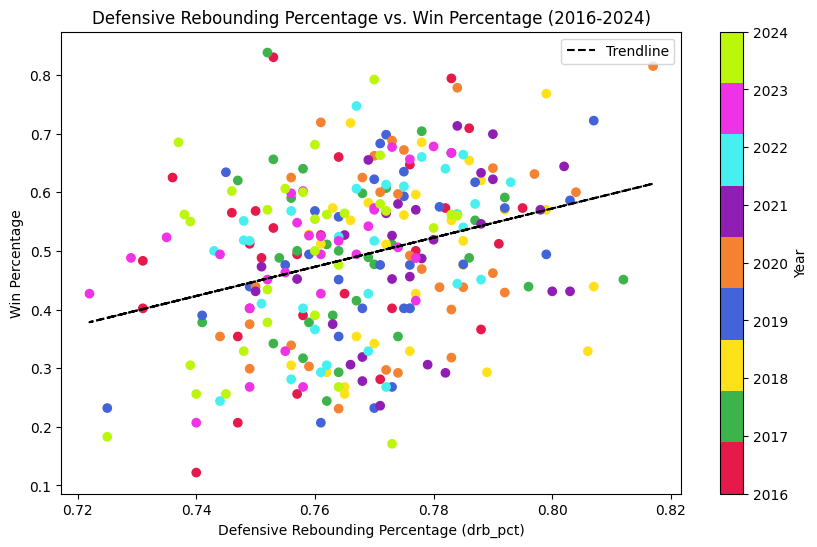

In [18]:
# Filter data for years 2016-2024 (three-point revolution)
drb_pct_data = drb_pct_data[drb_pct_data['Year'].between('2016', '2024')]

# Create a list of colors for each year
colors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', 
          '#911eb4', '#46f0f0', '#f032e6', '#bcf60c']

# Create a colormap using the defined colors
cmap = ListedColormap(colors[:len(drb_pct_data['Year'].unique())])

# Colormap index-matching for years
year_mapping = {year: idx for idx, year in enumerate(sorted(drb_pct_data['Year'].unique()))}
drb_pct_data['year_color'] = drb_pct_data['Year'].map(year_mapping)

# set chart size
plt.figure(figsize=(10, 6))

# Scatter plot with colors representing different years
scatter = plt.scatter(
    drb_pct_data['drb_pct'], 
    drb_pct_data['win_pct'], 
    c=drb_pct_data['year_color'], 
    cmap=cmap, 
    alpha=1.0 # transparency
)

# Add color bar with year ticks
cbar = plt.colorbar(scatter, ticks=range(len(year_mapping)))
cbar.set_label('Year')
cbar.set_ticks(list(year_mapping.values()))
cbar.set_ticklabels(list(year_mapping.keys()))

# Calculate and plot the trendline
z = np.polyfit(drb_pct_data['drb_pct'], drb_pct_data['win_pct'], 1)
p = np.poly1d(z)
plt.plot(drb_pct_data['drb_pct'], p(drb_pct_data['drb_pct']), color='black', linestyle='--', label='Trendline')

# Labels and title
plt.xlabel('Defensive Rebounding Percentage (drb_pct)')
plt.ylabel('Win Percentage')
plt.title('Defensive Rebounding Percentage vs. Win Percentage (2016-2024)')
plt.grid(False) # enable this to better see the trendline
plt.legend()
plt.show()

In [19]:
# Directory paths based on your updated folder structure
ftr_dir = '../TeamMetrics_Oct-12/ftr'
win_pct_dir = '../TeamMetrics_Oct-12/win_pct'

# List of years based on the filenames in the 'ftr' directory
years = [f.split('_')[1].split('.')[0] for f in os.listdir(ftr_dir) if f.endswith('.csv')]

ftr_data = pd.DataFrame()

# Combine ftr and win percentage data for each year
for year in years:
    ftr_file = os.path.join(ftr_dir, f'ftr_{year}.csv')
    win_pct_file = os.path.join(win_pct_dir, f'win_pct_{year}.csv')

    ftr_year = pd.read_csv(ftr_file)
    win_pct_year = pd.read_csv(win_pct_file)

    # Verify statistic and team exist
    ftr_year = ftr_year[['Rank', 'Team', 'Statistic']].rename(columns={'Statistic': 'ftr'})
    win_pct_year = win_pct_year[['Rank', 'Team', 'Statistic']].rename(columns={'Statistic': 'win_pct'})

    # Merge the dataframes ftr and win_pct on 'Team'
    combined = pd.merge(ftr_year, win_pct_year, on='Team', how='inner')
    combined['Year'] = year  # Add year identifier

    # Combine data
    ftr_data = pd.concat([ftr_data, combined], ignore_index=True)
    
# Check the first few rows to verify data
print(ftr_data.head(5))

# Pearson correlation coefficient
correlation = ftr_data['ftr'].corr(ftr_data['win_pct'])
print(f'Pearson Correlation Coefficient: {correlation:.5f}')

   Rank_x         Team    ftr  Rank_y  win_pct  Year
0       1    LA Lakers  0.268       5    0.664  2004
1       2         Utah  0.259      11    0.512  2004
2       3  LA Clippers  0.258      25    0.342  2004
3       4      Detroit  0.250       4    0.667  2004
4       5    Milwaukee  0.248      16    0.483  2004
Pearson Correlation Coefficient: 0.13481


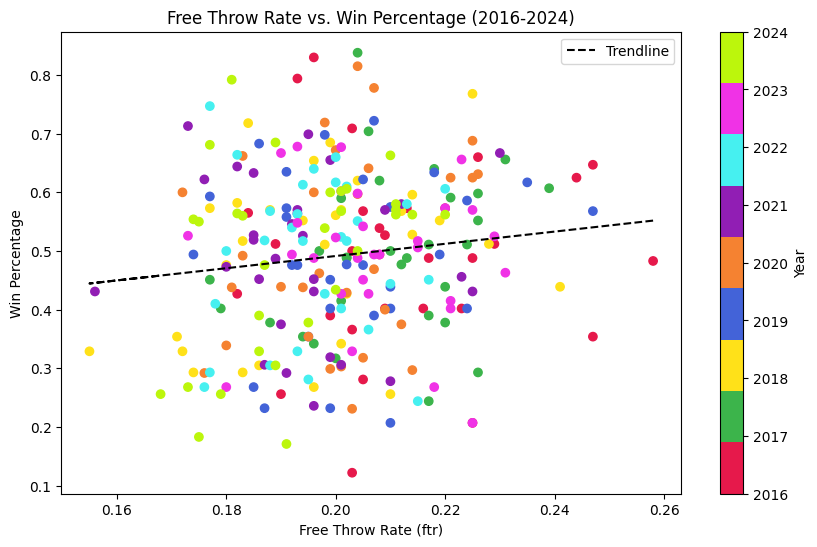

In [20]:
# Filter data for years 2016-2024
ftr_data = ftr_data[ftr_data['Year'].between('2016', '2024')]

# Create a list of colors for each year
colors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', 
          '#911eb4', '#46f0f0', '#f032e6', '#bcf60c']

# Create a colormap using the defined colors
cmap = ListedColormap(colors[:len(ftr_data['Year'].unique())])

# Colormap index-matching for years
year_mapping = {year: idx for idx, year in enumerate(sorted(ftr_data['Year'].unique()))}
ftr_data['year_color'] = ftr_data['Year'].map(year_mapping)

# Set chart size
plt.figure(figsize=(10, 6))

# Scatter plot with colors representing different years
scatter = plt.scatter(
    ftr_data['ftr'], 
    ftr_data['win_pct'], 
    c=ftr_data['year_color'], 
    cmap=cmap, 
    alpha=1.0 # transparency
)

# Add color bar with year ticks
cbar = plt.colorbar(scatter, ticks=range(len(year_mapping)))
cbar.set_label('Year')
cbar.set_ticks(list(year_mapping.values()))
cbar.set_ticklabels(list(year_mapping.keys()))

# Calculate and plot the trendline
z = np.polyfit(ftr_data['ftr'], ftr_data['win_pct'], 1)
p = np.poly1d(z)
plt.plot(ftr_data['ftr'], p(ftr_data['ftr']), color='black', linestyle='--', label='Trendline')

# Labels and title
plt.xlabel('Free Throw Rate (ftr)')
plt.ylabel('Win Percentage')
plt.title('Free Throw Rate vs. Win Percentage (2016-2024)')
plt.grid(False) # enable this to better see the trendline
plt.legend()
plt.show()

In [21]:

# Directory paths based on your updated folder structure
orb_pct_dir = '../TeamMetrics_Oct-12/orb_pct'
win_pct_dir = '../TeamMetrics_Oct-12/win_pct'

# List of years based on the filenames in the 'orb_pct' directory
years = [f.split('_')[2].split('.')[0] for f in os.listdir(orb_pct_dir) if f.endswith('.csv')]

orb_pct_data = pd.DataFrame()

# Combine orb_pct and win percentage data for each year
for year in years:
    orb_pct_file = os.path.join(orb_pct_dir, f'orb_pct_{year}.csv')
    win_pct_file = os.path.join(win_pct_dir, f'win_pct_{year}.csv')

    orb_pct_year = pd.read_csv(orb_pct_file)
    win_pct_year = pd.read_csv(win_pct_file)

    # Verify statistic and team exist
    orb_pct_year = orb_pct_year[['Rank', 'Team', 'Statistic']].rename(columns={'Statistic': 'orb_pct'})
    win_pct_year = win_pct_year[['Rank', 'Team', 'Statistic']].rename(columns={'Statistic': 'win_pct'})

    # Merge the dataframes orb_pct and win_pct on 'Team'
    combined = pd.merge(orb_pct_year, win_pct_year, on='Team', how='inner')
    combined['Year'] = year  # Add year identifier

    # Combine data
    orb_pct_data = pd.concat([orb_pct_data, combined], ignore_index=True)
    
# Check the first few rows to verify data
print(orb_pct_data.head(5))

# Pearson correlation coefficient
correlation = orb_pct_data['orb_pct'].corr(orb_pct_data['win_pct'])
print(f'Pearson Correlation Coefficient: {correlation:.5f}')


   Rank_x         Team  orb_pct  Rank_y  win_pct  Year
0       1         Utah    0.341      11    0.512  2004
1       2  LA Clippers    0.328      25    0.342  2004
2       3       Dallas    0.318       7    0.609  2004
3       4     Portland    0.312      14    0.500  2004
4       5    Cleveland    0.312      20    0.427  2004
Pearson Correlation Coefficient: 0.00985


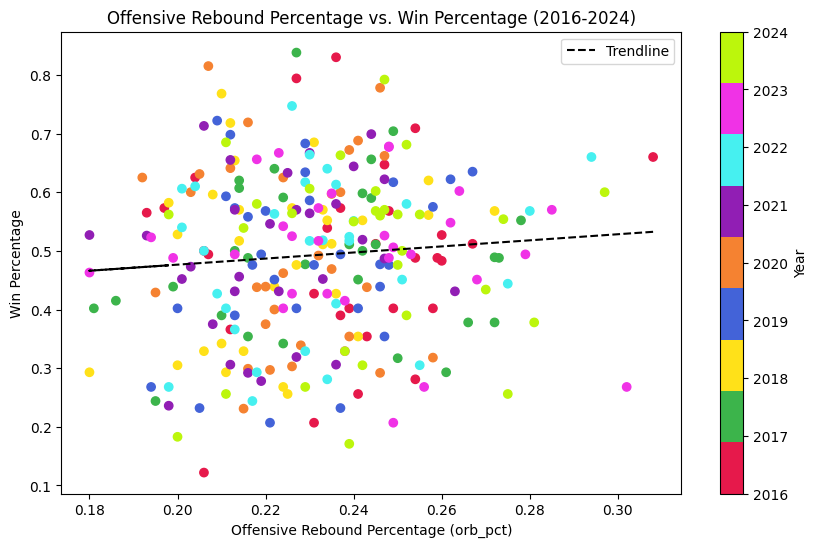

In [22]:

# Filter data for years 2016-2024
orb_pct_data = orb_pct_data[orb_pct_data['Year'].between('2016', '2024')]

# Create a list of colors for each year
colors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', 
          '#911eb4', '#46f0f0', '#f032e6', '#bcf60c']

# Create a colormap using the defined colors
cmap = ListedColormap(colors[:len(orb_pct_data['Year'].unique())])

# Colormap index-matching for years
year_mapping = {year: idx for idx, year in enumerate(sorted(orb_pct_data['Year'].unique()))}
orb_pct_data['year_color'] = orb_pct_data['Year'].map(year_mapping)

# Set chart size
plt.figure(figsize=(10, 6))

# Scatter plot with colors representing different years
scatter = plt.scatter(
    orb_pct_data['orb_pct'], 
    orb_pct_data['win_pct'], 
    c=orb_pct_data['year_color'], 
    cmap=cmap, 
    alpha=1.0 # transparency
)

# Add color bar with year ticks
cbar = plt.colorbar(scatter, ticks=range(len(year_mapping)))
cbar.set_label('Year')
cbar.set_ticks(list(year_mapping.values()))
cbar.set_ticklabels(list(year_mapping.keys()))

# Calculate and plot the trendline
z = np.polyfit(orb_pct_data['orb_pct'], orb_pct_data['win_pct'], 1)
p = np.poly1d(z)
plt.plot(orb_pct_data['orb_pct'], p(orb_pct_data['orb_pct']), color='black', linestyle='--', label='Trendline')

# Labels and title
plt.xlabel('Offensive Rebound Percentage (orb_pct)')
plt.ylabel('Win Percentage')
plt.title('Offensive Rebound Percentage vs. Win Percentage (2016-2024)')
plt.grid(False) # enable this to better see the trendline
plt.legend()
plt.show()

In [23]:

# Directory paths based on your updated folder structure
tov_pct_dir = '../TeamMetrics_Oct-12/tov_pct'
win_pct_dir = '../TeamMetrics_Oct-12/win_pct'

# List of years based on the filenames in the 'tov_pct' directory
years = [f.split('_')[2].split('.')[0] for f in os.listdir(tov_pct_dir) if f.endswith('.csv')]

tov_pct_data = pd.DataFrame()

# Combine tov_pct and win percentage data for each year
for year in years:
    tov_pct_file = os.path.join(tov_pct_dir, f'tov_pct_{year}.csv')
    win_pct_file = os.path.join(win_pct_dir, f'win_pct_{year}.csv')

    tov_pct_year = pd.read_csv(tov_pct_file)
    win_pct_year = pd.read_csv(win_pct_file)
    tov_pct_year = tov_pct_year[['Rank', 'Team', 'Statistic']].rename(columns={'Statistic': 'tov_pct'})
    win_pct_year = win_pct_year[['Rank', 'Team', 'Statistic']].rename(columns={'Statistic': 'win_pct'})

    # Merge the dataframes tov_pct and win_pct on 'Team'
    combined = pd.merge(tov_pct_year, win_pct_year, on='Team', how='inner')
    combined['Year'] = year  # Add year identifier

    # Combine data
    tov_pct_data = pd.concat([tov_pct_data, combined], ignore_index=True)
    
# Check the first few rows to verify data
print(tov_pct_data.head(5))

# Pearson correlation coefficient
correlation = tov_pct_data['tov_pct'].corr(tov_pct_data['win_pct'])
print(f'Pearson Correlation Coefficient: {correlation:.5f}')


   Rank_x       Team  tov_pct  Rank_y  win_pct  Year
0       1     Dallas    0.106       7    0.609  2004
1       2    Orlando    0.121      29    0.256  2004
2       3  Minnesota    0.123       3    0.680  2004
3       4  LA Lakers    0.123       5    0.664  2004
4       5  Milwaukee    0.124      16    0.483  2004
Pearson Correlation Coefficient: -0.30593


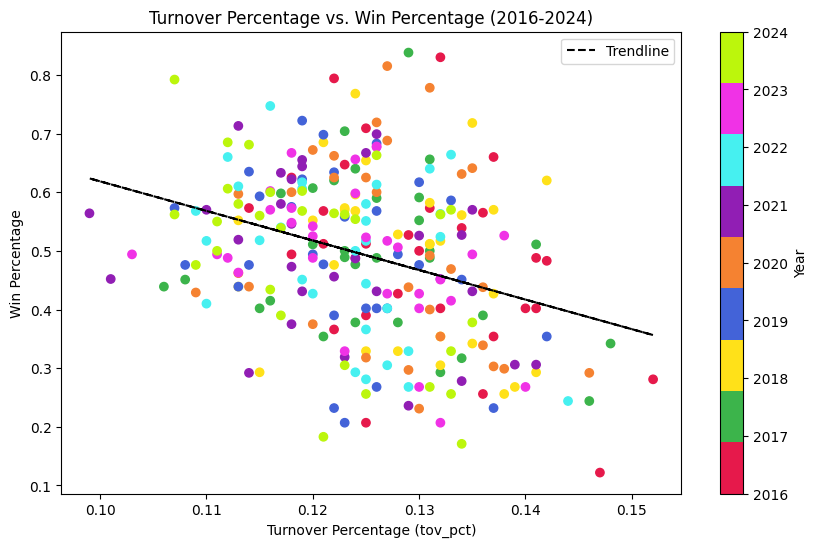

In [24]:
# Filter data for years 2016-2024
tov_pct_data = tov_pct_data[tov_pct_data['Year'].between('2016', '2024')]

# Create a list of colors for each year
colors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', 
          '#911eb4', '#46f0f0', '#f032e6', '#bcf60c']

# Create a colormap using the defined colors
cmap = ListedColormap(colors[:len(tov_pct_data['Year'].unique())])

# Colormap index-matching for years
year_mapping = {year: idx for idx, year in enumerate(sorted(tov_pct_data['Year'].unique()))}
tov_pct_data['year_color'] = tov_pct_data['Year'].map(year_mapping)

# Set chart size
plt.figure(figsize=(10, 6))

# Scatter plot with colors representing different years
scatter = plt.scatter(
    tov_pct_data['tov_pct'], 
    tov_pct_data['win_pct'], 
    c=tov_pct_data['year_color'], 
    cmap=cmap, 
    alpha=1.0 # transparency
)

# Add color bar with year ticks
cbar = plt.colorbar(scatter, ticks=range(len(year_mapping)))
cbar.set_label('Year')
cbar.set_ticks(list(year_mapping.values()))
cbar.set_ticklabels(list(year_mapping.keys()))

# Calculate and plot the trendline
z = np.polyfit(tov_pct_data['tov_pct'], tov_pct_data['win_pct'], 1)
p = np.poly1d(z)
plt.plot(tov_pct_data['tov_pct'], p(tov_pct_data['tov_pct']), color='black', linestyle='--', label='Trendline')

# Labels and title
plt.xlabel('Turnover Percentage (tov_pct)')
plt.ylabel('Win Percentage')
plt.title('Turnover Percentage vs. Win Percentage (2016-2024)')
plt.grid(False) # enable this to better see the trendline
plt.legend()
plt.show()